<a href="https://colab.research.google.com/github/d4nye1/ChallengeONEDataScience-_Telecom-X-parte-2/blob/main/Telecomx_latam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [3]:
import pandas as pd

datos = pd.read_json('/content/TelecomX_Data (1).json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [5]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

columnaNueva = pd.concat([datos[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
columnaNueva.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#📊 Carga y análisis

In [6]:
columnaNueva['Cuentas_Diarias'] = (columnaNueva['Charges.Monthly'] / 30).round(2)

In [7]:
columnaNueva[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head()

,customerID,Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.19
1,0003-MKNFE,59.9,2.00
2,0004-TLHLJ,73.9,2.46
3,0011-IGKFF,98.0,3.27
4,0013-EXCHZ,83.9,2.80


In [8]:
columnaNueva.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [9]:
cols_binarias = [col for col in columnaNueva.columns if set(columnaNueva[col].unique()).issubset({'Yes', 'No'})]

for col in cols_binarias:
    columnaNueva[col] = columnaNueva[col].map({'Yes': 1, 'No': 0})

print("Columnas convertidas a binario:", cols_binarias)


Columnas convertidas a binario: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [10]:
columnaNueva.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [11]:
columnaNueva = columnaNueva.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Baja',
    'gender': 'Género',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'MesesContrato',
    'PhoneService': 'ServicioTeléfono',
    'MultipleLines': 'VariasLíneas',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProtecciónDispositivo',
    'TechSupport': 'SoporteTécnico',
    'StreamingTV': 'TVStreaming',
    'StreamingMovies': 'PelículasStreaming',
    'Contract': 'Contrato',
    'PaperlessBilling': 'FacturaDigital',
    'PaymentMethod': 'MétodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'CuentasDiarias'
})

#📄Informe final

In [12]:
columnaNueva.head()


,ID_Cliente,Baja,Género,AdultoMayor,Pareja,Dependientes,MesesContrato,ServicioTeléfono,VariasLíneas,ServicioInternet,...,ProtecciónDispositivo,SoporteTécnico,TVStreaming,PelículasStreaming,Contrato,FacturaDigital,MétodoPago,CargoMensual,CargoTotal,CuentasDiarias
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [13]:
columna = columnaNueva['CuentasDiarias']
media = columna.mean()
mediana = columna.median()
desviacion = columna.std()
minimo = columna.min()
maximo = columna.max()
cuartiles = columna.quantile([0.25, 0.5, 0.75])

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Desviación estándar: {desviacion}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print("Cuartiles:")
print(cuartiles)



Media: 2.157291867345535
Mediana: 2.34
Desviación estándar: 1.004406798729517
Mínimo: 0.61
Máximo: 3.96
Cuartiles:
0.25    1.180
0.50    2.340
0.75    2.995
Name: CuentasDiarias, dtype: float64


In [14]:
print(columnaNueva['Baja'].unique())

['No' 'Yes' '']


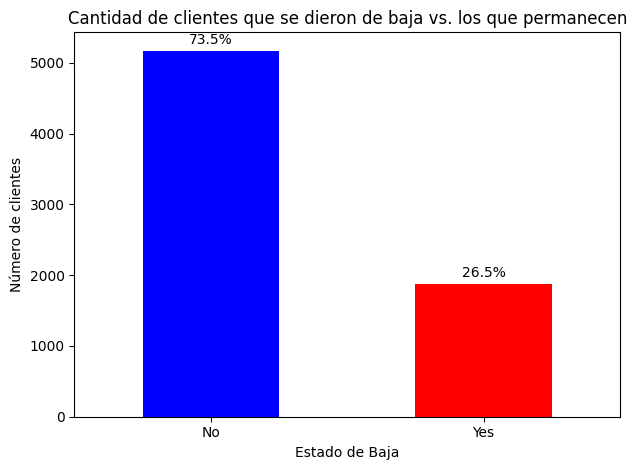

In [15]:
import matplotlib.pyplot as plt

valores_validos = columnaNueva[columnaNueva['Baja'].isin(['Yes', 'No'])]

baja_counts = valores_validos['Baja'].value_counts()

ax = baja_counts.plot(kind='bar', color=['blue', 'red'])

plt.title('Cantidad de clientes que se dieron de baja vs. los que permanecen')
plt.xlabel('Estado de Baja')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)

total = baja_counts.sum()
for i, valor in enumerate(baja_counts):
    porcentaje = f'{(valor / total) * 100:.1f}%'
    plt.text(i, valor + 100, porcentaje, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


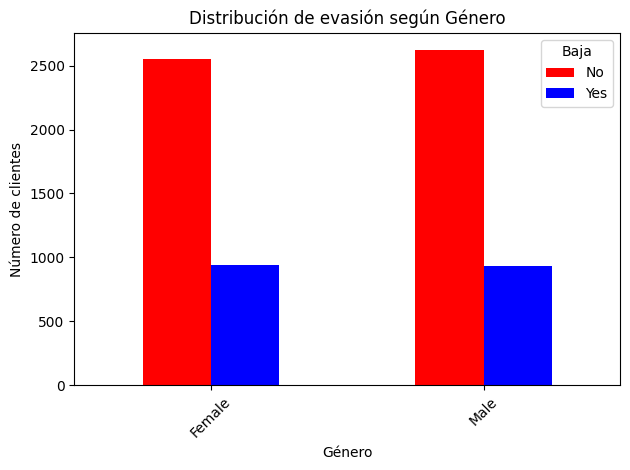

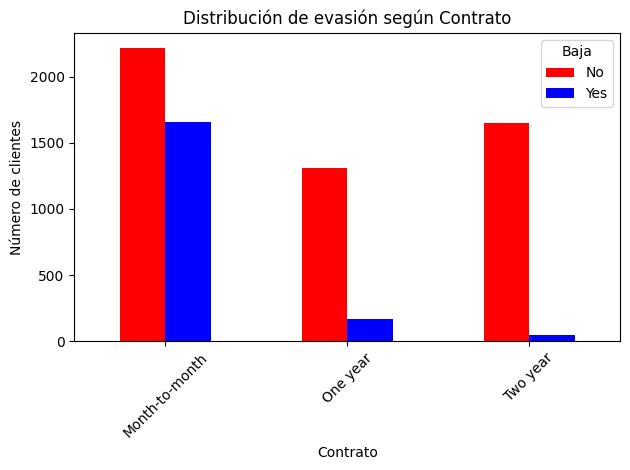

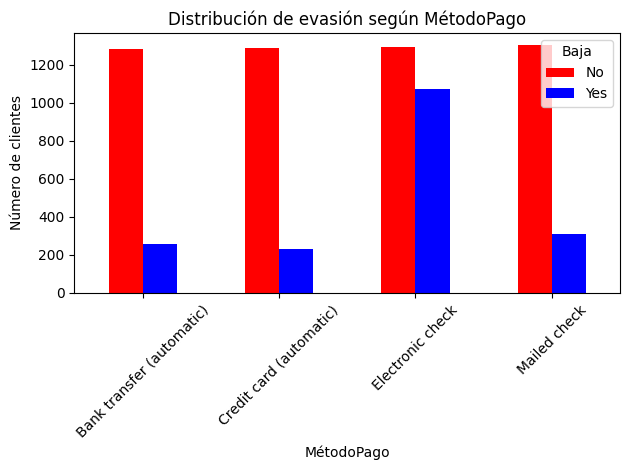

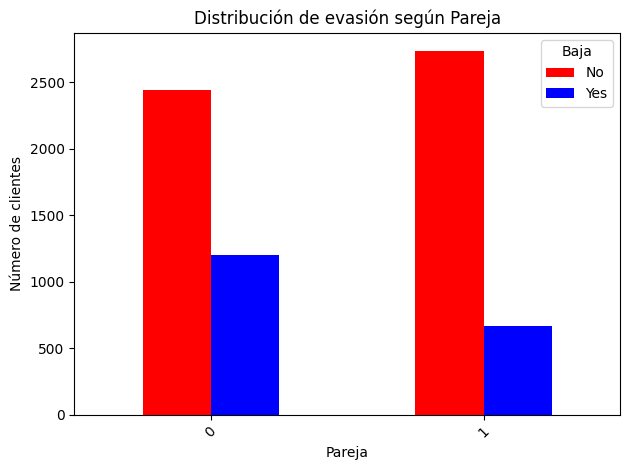

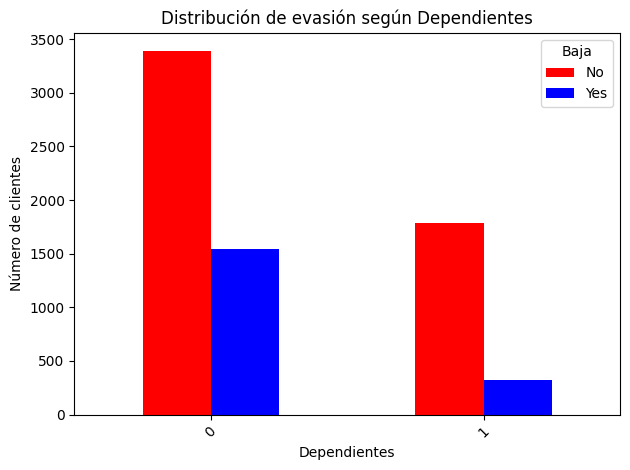

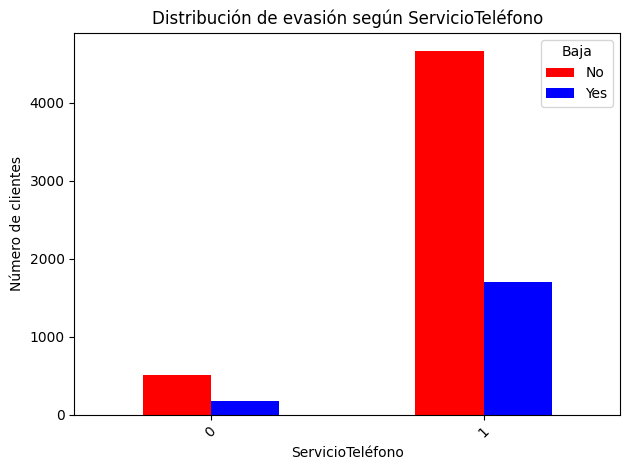

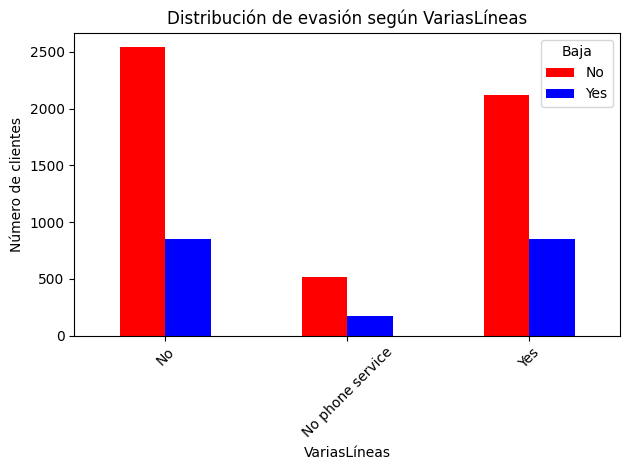

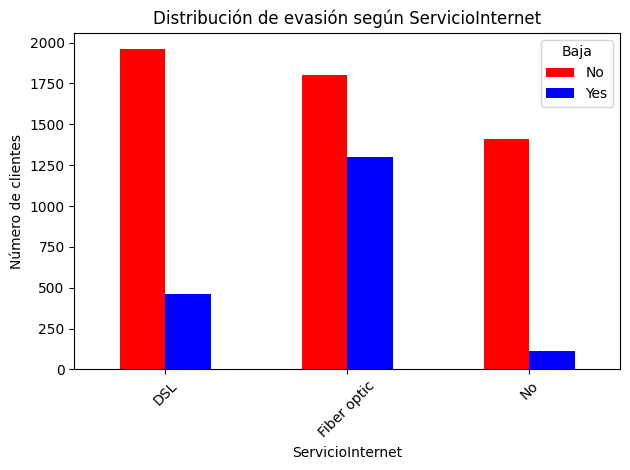

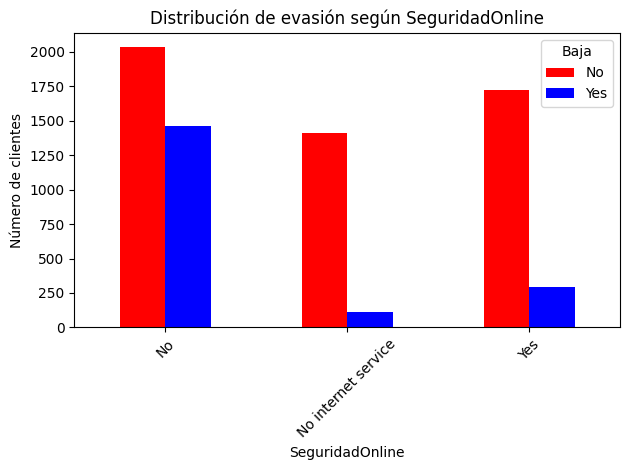

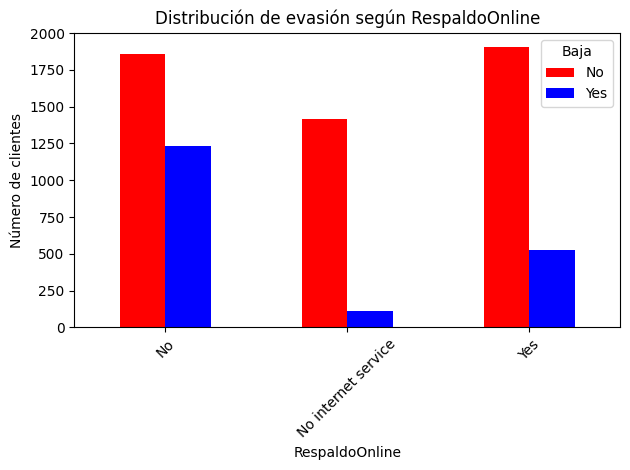

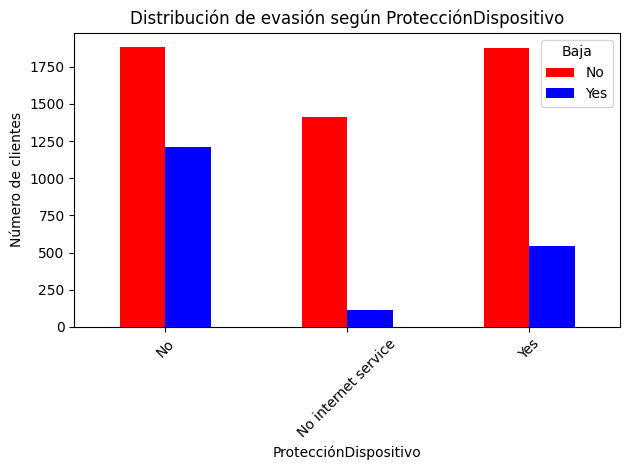

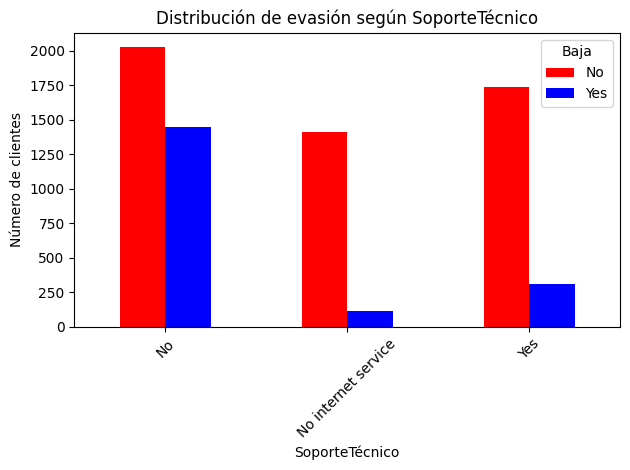

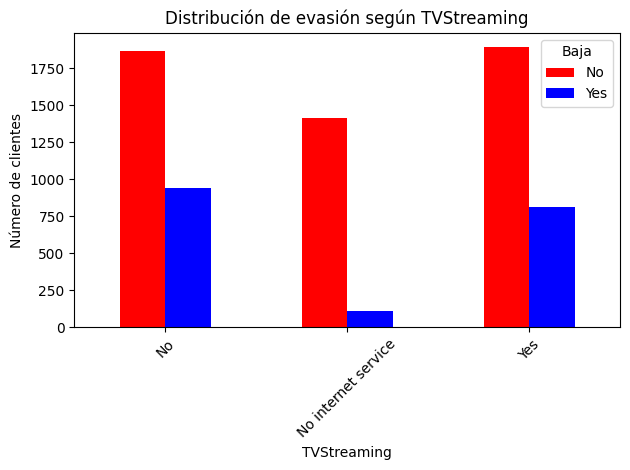

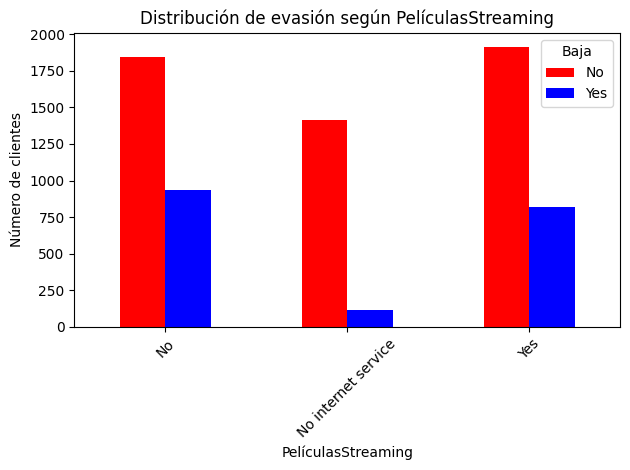

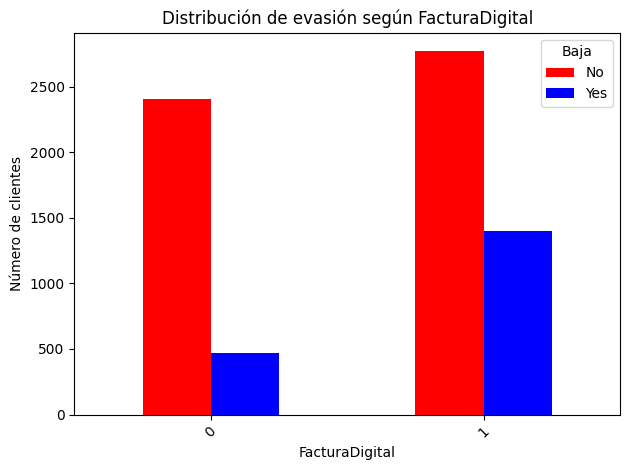

In [16]:
variables_categoricas = ['Género', 'Contrato', 'MétodoPago', 'Pareja', 'Dependientes', 'ServicioTeléfono',
                        'VariasLíneas', 'ServicioInternet', 'SeguridadOnline', 'RespaldoOnline', 'ProtecciónDispositivo',
                        'SoporteTécnico', 'TVStreaming', 'PelículasStreaming', 'FacturaDigital']

valores_validos = columnaNueva[columnaNueva['Baja'].isin(['Yes', 'No'])]

for var in variables_categoricas:
    tabla_cruzada = pd.crosstab(valores_validos[var], valores_validos['Baja'])
    ax = tabla_cruzada.plot(kind='bar', stacked=False, color=['red', 'blue'])
    plt.title(f'Distribución de evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=45)
    plt.legend(title='Baja')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3087461339.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=var, data=valores_validos, palette={'No': 'blue', 'Yes': 'red'})


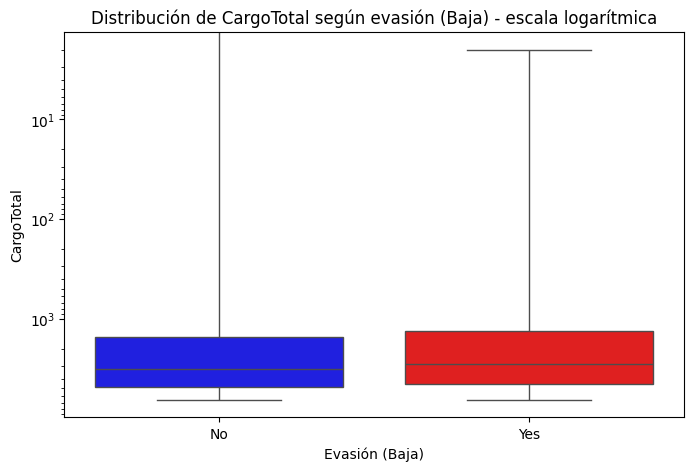

/tmp/ipython-input-3087461339.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja', y=var, data=valores_validos, palette={'No': 'blue', 'Yes': 'red'})


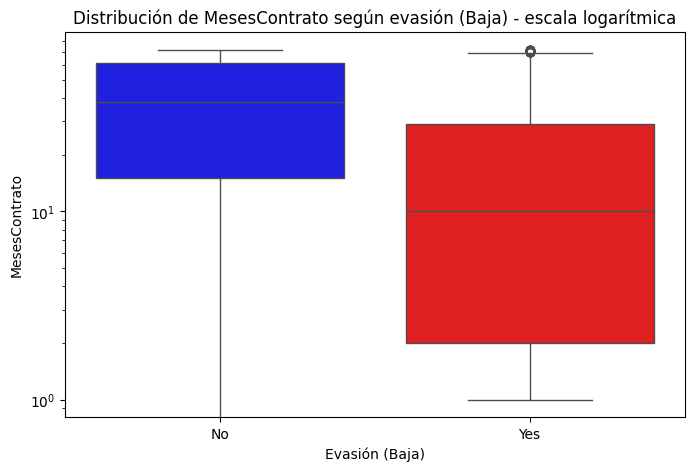

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

valores_validos = columnaNueva[columnaNueva['Baja'].isin(['Yes', 'No'])]

variables_numericas = ['CargoTotal', 'MesesContrato']

for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Baja', y=var, data=valores_validos, palette={'No': 'blue', 'Yes': 'red'})
    plt.yscale('log')
    plt.title(f'Distribución de {var} según evasión (Baja) - escala logarítmica')
    plt.xlabel('Evasión (Baja)')
    plt.ylabel(var)
    plt.show()



#Introducción
En este documento queremos entender por qué algunos clientes deciden cancelar su servicio, Saber qué características tienen estos clientes, en que nos puede ayudar a mejorar y evitar que más se vayan.

##Limpieza y Preparación de Datos##
- Se cambiaron los nombres de las columnas para que sean más fáciles de entender.
- Se cambiaron las categorías como género, tipo de contrato y método de pago estén bien definidas.

- se seleccionan las variables importantes para el análisis, como el total que gastó el cliente y cuánto tiempo ha tenido el servicio.

##Análisis de los Datos
###*Datos con categorías*
Aquí se hicieron gráficos para ver cómo se distribuyen los clientes que cancelaron y los que siguen según categorías como género, tipo de contrato y método de pago.



###*Datos numéricos*
Se comparan cuánto gastaron y cuánto tiempo han tenido el servicio los clientes que cancelaron frente a los que no. Usamos gráficos para ver si hay diferencias entre estos dos grupos.


#Conclusiones
- Los clientes con contratos cortos o que gastan menos tienden a cancelar más.

- Algunos tipos de contrato o métodos de pago tienen más clientes que cancelan.

- Los clientes que llevan más tiempo con el servicio y gastan más suelen quedarse.

#Recomendaciones
Hacer ofertas especiales o beneficios para los clientes con contratos cortos o con ciertos métodos de pago para que no cancelen.

Usar esta información para mejorar la comunicación y ofertas para los clientes.

Determinar una mejor organizacion para que los clientes no cancelen y sigan con nosotro.

#Eliminando columnas que no aportan

In [19]:
#eliminando columnas que no aportan

if 'ID_Cliente' in columnaNueva.columns:
    columnaNueva = columnaNueva.drop(columns=['ID_Cliente'])


constantes = [col for col in columnaNueva.columns if columnaNueva[col].nunique() <= 1]
columnaNueva = columnaNueva.drop(columns=constantes)


umbral = 0.5
columnaNueva = columnaNueva.dropna(thresh=len(columnaNueva) * (1 - umbral), axis=1)

print("Columnas eliminadas por ser irrelevantes o con demasiados nulos:", constantes)



categoricas = columnaNueva.select_dtypes(include=['object']).columns.tolist()


columnaNueva_encoded = pd.get_dummies(columnaNueva, columns=categoricas, drop_first=True)

print("Columnas transformadas con One-Hot Encoding:", categoricas)



print("Shape final:", columnaNueva_encoded.shape)
columnaNueva_encoded.head()

Columnas eliminadas por ser irrelevantes o con demasiados nulos: []
Columnas transformadas con One-Hot Encoding: ['Baja', 'Género', 'VariasLíneas', 'ServicioInternet', 'SeguridadOnline', 'RespaldoOnline', 'ProtecciónDispositivo', 'SoporteTécnico', 'TVStreaming', 'PelículasStreaming', 'Contrato', 'MétodoPago', 'CargoTotal']
Shape final: (7267, 6562)


,AdultoMayor,Pareja,Dependientes,MesesContrato,ServicioTeléfono,FacturaDigital,CargoMensual,CuentasDiarias,Baja_No,Baja_Yes,...,CargoTotal_995.35,CargoTotal_996.45,CargoTotal_996.85,CargoTotal_996.95,CargoTotal_997.65,CargoTotal_997.75,CargoTotal_998.1,CargoTotal_999.45,CargoTotal_999.8,CargoTotal_999.9
0,0,1,1,9,1,1,65.6,2.19,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,9,1,0,59.9,2.00,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,4,1,1,73.9,2.46,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1,1,0,13,1,1,98.0,3.27,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1,1,0,3,1,1,83.9,2.80,False,True,...,False,False,False,False,False,False,False,False,False,False


#Proporción de clientes que cancelaron en relación con los que permanecieron activos

Conteo de clientes:
Baja
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporción (%):
Baja
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


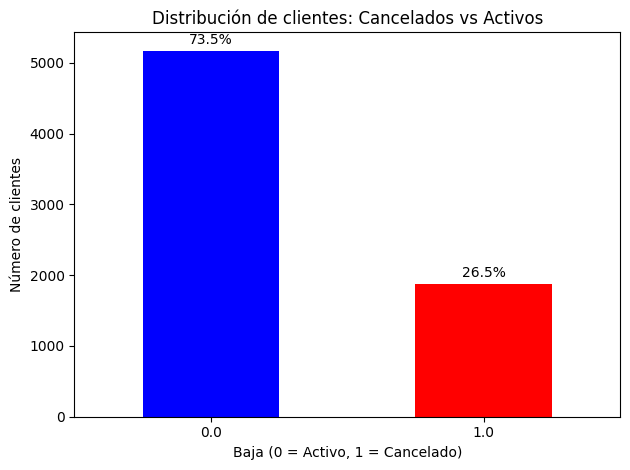

In [23]:

columnaNueva['Baja'] = columnaNueva['Baja'].map({'Yes': 1, 'No': 0})


proporcion = columnaNueva['Baja'].value_counts(normalize=True) * 100
conteo = columnaNueva['Baja'].value_counts()

print("Conteo de clientes:")
print(conteo)
print("\nProporción (%):")
print(proporcion)

import matplotlib.pyplot as plt

ax = conteo.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de clientes: Cancelados vs Activos')
plt.xlabel('Baja (0 = Activo, 1 = Cancelado)')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)

total = conteo.sum()
for i, valor in enumerate(conteo):
    porcentaje = f'{(valor / total) * 100:.1f}%'
    plt.text(i, valor + 100, porcentaje, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [40]:
# Revisar valores reales y su tipo
print(columnaNueva_encoded['Baja'].head(20))
print(columnaNueva_encoded['Baja'].dtype)
print(columnaNueva_encoded['Baja'].isna().sum())




0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Baja, dtype: float64
float64
7267


In [43]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

#Reconstruir 'Baja' desde la columna original Churn
columnaNueva_encoded['Baja'] = datos['Churn'].map({'Yes':1, 'No':0})

#Eliminar filas que sean NaN
datos_validos = columnaNueva_encoded.dropna(subset=['Baja']).copy()
datos_validos['Baja'] = datos_validos['Baja'].astype(int)

print("Número de filas válidas:", len(datos_validos))
print("Distribución de clases antes de SMOTE:")
print(datos_validos['Baja'].value_counts())

#Separar X e y
X = datos_validos.drop(columns=['Baja'])
y = datos_validos['Baja']

#Imputar valores faltantes en X
imputer_num = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer_num.fit_transform(X), columns=X.columns)

#Aplicar SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imputed, y)

#Crear DataFrame final balanceado
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['Baja'] = y_smote

print("\nDistribución después de aplicar SMOTE:")
print(df_smote['Baja'].value_counts())
print("\nDataset final listo para análisis y modelado:")
print(df_smote.head())


Número de filas válidas: 7043
Distribución de clases antes de SMOTE:
Baja
0    5174
1    1869
Name: count, dtype: int64

Distribución después de aplicar SMOTE:
Baja
0    5174
1    5174
Name: count, dtype: int64

Dataset final listo para análisis y modelado:
   AdultoMayor  Pareja  Dependientes  MesesContrato  ServicioTeléfono  \
0          0.0     1.0           1.0            9.0               1.0   
1          0.0     0.0           0.0            9.0               1.0   
2          0.0     0.0           0.0            4.0               1.0   
3          1.0     1.0           0.0           13.0               1.0   
4          1.0     1.0           0.0            3.0               1.0   

   FacturaDigital  CargoMensual  CargoTotal  CuentasDiarias  Género_Male  ...  \
0             1.0          65.6      593.30            2.19          0.0  ...   
1             0.0          59.9      542.40            2.00          1.0  ...   
2             1.0          73.9      280.85            2.46 

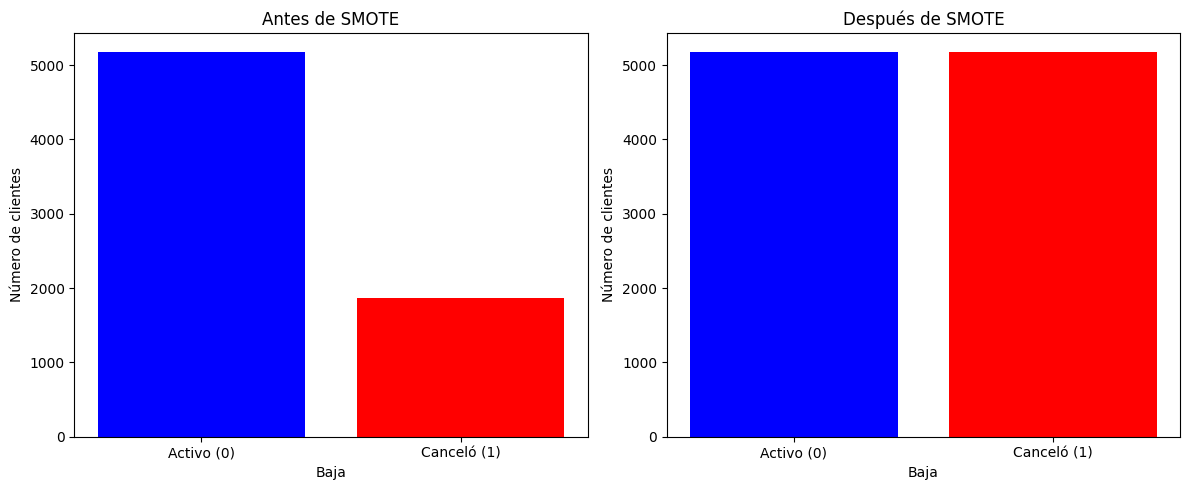

In [44]:
import matplotlib.pyplot as plt

distribucion_antes = datos_validos['Baja'].value_counts()
distribucion_despues = df_smote['Baja'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Antes de SMOTE
axes[0].bar(distribucion_antes.index.astype(str), distribucion_antes.values, color=['blue','red'])
axes[0].set_title('Antes de SMOTE')
axes[0].set_xlabel('Baja')
axes[0].set_ylabel('Número de clientes')
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(['Activo (0)','Canceló (1)'])

# Después de SMOTE
axes[1].bar(distribucion_despues.index.astype(str), distribucion_despues.values, color=['blue','red'])
axes[1].set_title('Después de SMOTE')
axes[1].set_xlabel('Baja')
axes[1].set_ylabel('Número de clientes')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(['Activo (0)','Canceló (1)'])

plt.tight_layout()
plt.show()


##Normalizado de datos

In [45]:
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas numéricas (excluyendo la variable objetivo)
num_cols = ['MesesContrato', 'CargoMensual', 'CargoTotal', 'CuentasDiarias']  # agrega otras numéricas si existen

scaler = StandardScaler()
df_smote[num_cols] = scaler.fit_transform(df_smote[num_cols])

# Verificar
print(df_smote[num_cols].head())


   MesesContrato  CargoMensual  CargoTotal  CuentasDiarias
0      -0.781298     -0.084665   -0.665592       -0.081180
1      -0.781298     -0.283143   -0.688876       -0.279636
2      -0.989746      0.204346   -0.808522        0.200836
3      -0.614540      1.043522   -0.370743        1.046885
4      -1.031436      0.552552   -0.814674        0.555968


##Matriz

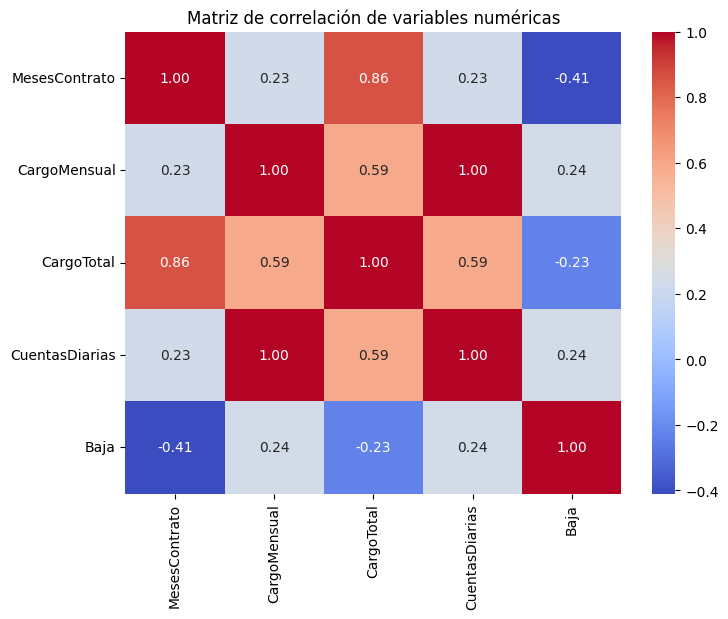


Correlación con la cancelación (Baja):
Baja              1.000000
CuentasDiarias    0.235684
CargoMensual      0.235608
CargoTotal       -0.230817
MesesContrato    -0.409771
Name: Baja, dtype: float64


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

#Seleccionar solo variables numéricas
num_cols = ['MesesContrato', 'CargoMensual', 'CargoTotal', 'CuentasDiarias']  # ya estandarizadas
df_corr = df_smote[num_cols + ['Baja']]  # incluimos la variable objetivo

#Calcular la matriz de correlación
corr_matrix = df_corr.corr()

#Mostrar la matriz con un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

#Opcional: imprimir correlación de cada variable con la cancelación
print("\nCorrelación con la cancelación (Baja):")
print(corr_matrix['Baja'].sort_values(ascending=False))


/tmp/ipython-input-1409349141.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja_str', y='MesesContrato', data=df_smote, palette={'0':'blue','1':'red'})


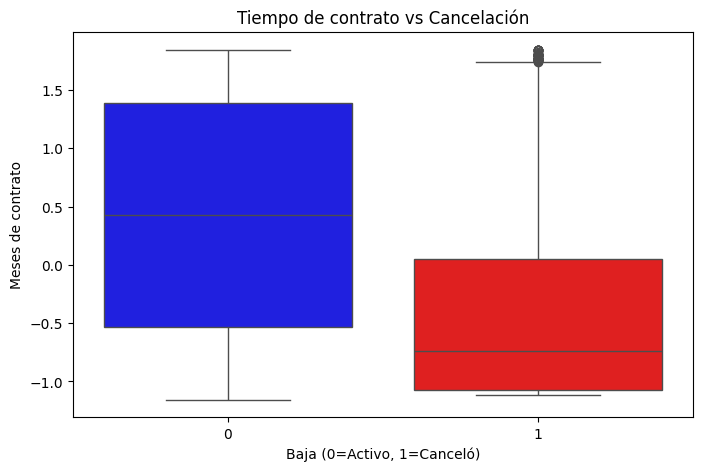

/tmp/ipython-input-1409349141.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baja_str', y='CargoTotal', data=df_smote, palette={'0':'blue','1':'red'})


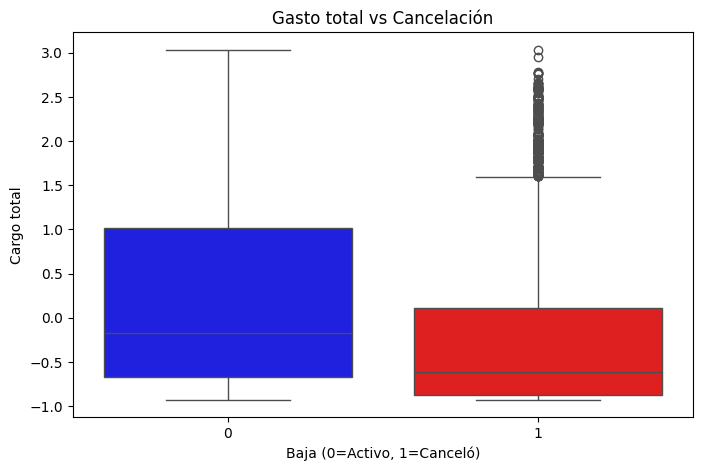

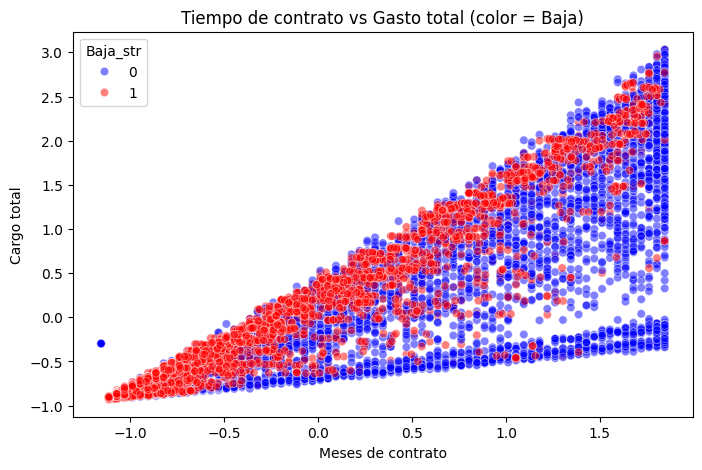

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

#Convertir la columna 'Baja' a string
df_smote['Baja_str'] = df_smote['Baja'].astype(str)

#Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='Baja_str', y='MesesContrato', data=df_smote, palette={'0':'blue','1':'red'})
plt.title('Tiempo de contrato vs Cancelación')
plt.xlabel('Baja (0=Activo, 1=Canceló)')
plt.ylabel('Meses de contrato')
plt.show()

#Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8,5))
sns.boxplot(x='Baja_str', y='CargoTotal', data=df_smote, palette={'0':'blue','1':'red'})
plt.title('Gasto total vs Cancelación')
plt.xlabel('Baja (0=Activo, 1=Canceló)')
plt.ylabel('Cargo total')
plt.show()

#Scatter plot: Tiempo de contrato vs Gasto total, coloreado por cancelación
plt.figure(figsize=(8,5))
sns.scatterplot(x='MesesContrato', y='CargoTotal', hue='Baja_str', data=df_smote, palette={'0':'blue','1':'red'}, alpha=0.5)
plt.title('Tiempo de contrato vs Gasto total (color = Baja)')
plt.xlabel('Meses de contrato')
plt.ylabel('Cargo total')
plt.show()


#Separacion de datos

In [50]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df_smote.drop(columns=['Baja', 'Baja_str'])  # Eliminamos la columna original y la string usada para gráficos
y = df_smote['Baja']

#test_size=0.3 → 30% para prueba, 70% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Verificar tamaños de los conjuntos
print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

#Verificar distribución de clases
print("\nDistribución en entrenamiento:\n", y_train.value_counts())
print("\nDistribución en prueba:\n", y_test.value_counts())


Tamaño entrenamiento: 7243
Tamaño prueba: 3105

Distribución en entrenamiento:
 Baja
1    3622
0    3621
Name: count, dtype: int64

Distribución en prueba:
 Baja
0    1553
1    1552
Name: count, dtype: int64


In [52]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
num_features = ['MesesContrato', 'CargoMensual', 'CargoTotal', 'CuentasDiarias']

# Crear escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = X_train.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])

# Transformar los datos de prueba
X_test_scaled = X_test.copy()
X_test_scaled[num_features] = scaler.transform(X_test[num_features])


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar
logreg.fit(X_train_scaled, y_train)

# Predecir
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluar
print("=== Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


=== Regresión Logística ===
[[1123  430]
 [ 296 1256]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1553
           1       0.74      0.81      0.78      1552

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



In [54]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar
rf.fit(X_train, y_train)  # NOTA: usamos X_train sin escalar

# Predecir
y_pred_rf = rf.predict(X_test)

# Evaluar
print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
[[1345  208]
 [ 239 1313]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1553
           1       0.86      0.85      0.85      1552

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



In [55]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# 🔹 1️⃣ Normalizar variables numéricas para Regresión Logística
num_features = ['MesesContrato', 'CargoMensual', 'CargoTotal', 'CuentasDiarias']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled = X_test.copy()
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

# 🔹 2️⃣ Entrenar Regresión Logística
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# 🔹 3️⃣ Entrenar Random Forest (sin normalización)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 🔹 4️⃣ Función para calcular métricas
def obtener_metricas(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

# 🔹 5️⃣ Crear DataFrame comparativo
metricas_logreg = obtener_metricas(y_test, y_pred_logreg)
metricas_rf = obtener_metricas(y_test, y_pred_rf)

df_metricas = pd.DataFrame([metricas_logreg, metricas_rf], index=['Regresión Logística', 'Random Forest'])
print("=== Comparativa de modelos ===")
print(df_metricas)

# 🔹 6️⃣ Mostrar matrices de confusión
print("\n=== Matriz de confusión: Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_logreg))

print("\n=== Matriz de confusión: Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))


=== Comparativa de modelos ===
                     Accuracy  Precision    Recall  F1-score
Regresión Logística  0.766184   0.744958  0.809278  0.775788
Random Forest        0.856039   0.863248  0.846005  0.854540

=== Matriz de confusión: Regresión Logística ===
[[1123  430]
 [ 296 1256]]

=== Matriz de confusión: Random Forest ===
[[1345  208]
 [ 239 1313]]


In [56]:
print("=== Comparativa de modelos ===")
print(df_metricas)

print("\n=== Matriz de confusión: Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_logreg))

print("\n=== Matriz de confusión: Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))


=== Comparativa de modelos ===
                     Accuracy  Precision    Recall  F1-score
Regresión Logística  0.766184   0.744958  0.809278  0.775788
Random Forest        0.856039   0.863248  0.846005  0.854540

=== Matriz de confusión: Regresión Logística ===
[[1123  430]
 [ 296 1256]]

=== Matriz de confusión: Random Forest ===
[[1345  208]
 [ 239 1313]]


##Analisis


###Comparación de métricas:
Obserbando los números del F1-score, precisión y recall. El modelo que tenga números más altos hace mejores predicciones y es más confiable para decir si un cliente va a cancelar o no.

###Overfitting y underfitting:

Overfitting: pasa cuando el modelo aprende demasiado de los datos que tiene y después no funciona bien con datos nuevos. Por ejemplo, si Random Forest acierta mucho en entrenamiento pero falla en prueba, podría estar sobreajustado.

Underfitting: pasa cuando el modelo no aprende suficiente de los datos y no predice bien ni en entrenamiento ni en prueba. Por ejemplo, si la Regresión Logística tiene números bajos, puede que no esté captando bien las relaciones.

###Qué se puede hacer si pasa esto:

Si Random Forest está sobreajustado, se pueden hacer árboles más simples o usar menos árboles.

Si Regresión Logística está muy simple, se pueden probar otras formas de las variables o normalizar mejor los datos.

#Analisis de variables

##Regresión Logística

Top 10 variables más importantes - Regresión Logística:
                         Variable  Importancia
3                   MesesContrato    -1.459733
27              Contrato_Two year    -1.435600
7                      CargoTotal     0.775670
26              Contrato_One year    -0.732862
12   ServicioInternet_Fiber optic     0.497644
21             SoporteTécnico_Yes    -0.493371
29    MétodoPago_Electronic check     0.490794
15            SeguridadOnline_Yes    -0.435505
10  VariasLíneas_No phone service     0.344041
5                  FacturaDigital     0.343062


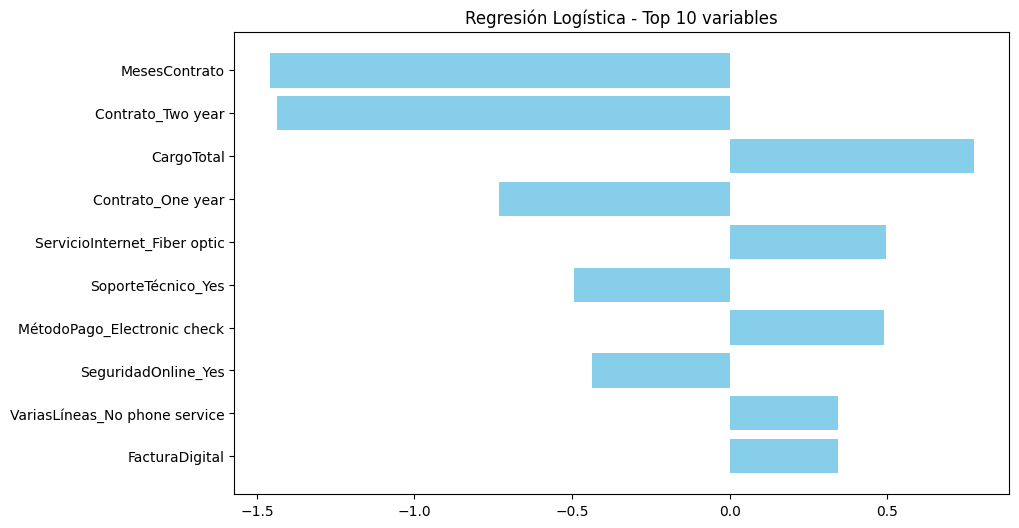

RandomForestClassifier(random_state=42)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# 🔹 1️⃣ Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

coef_logreg = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': logreg.coef_[0]
}).sort_values(by='Importancia', key=abs, ascending=False)

print("Top 10 variables más importantes - Regresión Logística:")
print(coef_logreg.head(10))

plt.figure(figsize=(10,6))
plt.barh(coef_logreg['Variable'].head(10), coef_logreg['Importancia'].head(10), color='skyblue')
plt.title("Regresión Logística - Top 10 variables")
plt.gca().invert_yaxis()
plt.show()


# 🔹 2️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # no necesita norma



##KNN (K-Nearest Neighbors)

Exactitud KNN: 0.789049919484702
Variables más importantes en KNN (permutación):
                   Variable  Importancia
3             MesesContrato     0.050403
7                CargoTotal     0.029436
5            FacturaDigital     0.012560
6              CargoMensual     0.011691
8            CuentasDiarias     0.011562
1                    Pareja     0.011143
9               Género_Male     0.010370
30  MétodoPago_Mailed check     0.008953
17       RespaldoOnline_Yes     0.006312
26        Contrato_One year     0.006119


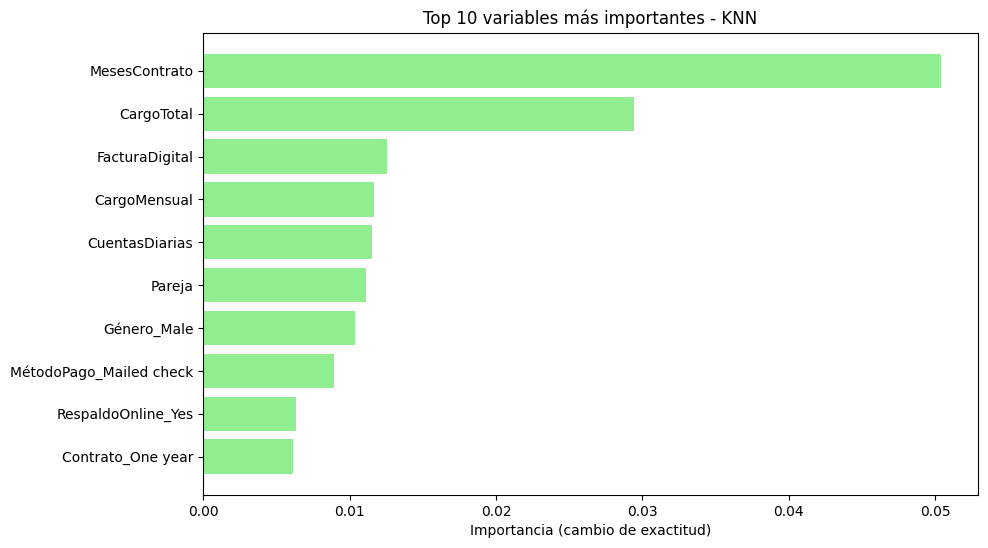

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import pandas as pd

#Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#Evaluar exactitud en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud KNN:", exactitud)

# Analizar importancia de variables por permutación
perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

importancia_knn = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': perm_importance.importances_mean
}).sort_values(by='Importancia', ascending=False)

#Mostrar las 10 variables más importantes
print("Variables más importantes en KNN (permutación):")
print(importancia_knn.head(10))

#Visualización simple
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importancia_knn['Variable'].head(10), importancia_knn['Importancia'].head(10), color='lightgreen')
plt.xlabel('Importancia (cambio de exactitud)')
plt.title('Top 10 variables más importantes - KNN')
plt.gca().invert_yaxis()
plt.show()


##Random Forest

Top 10 variables más importantes - Random Forest:
                        Variable  Importancia
3                  MesesContrato     0.114552
7                     CargoTotal     0.112105
29   MétodoPago_Electronic check     0.094541
6                   CargoMensual     0.080431
8                 CuentasDiarias     0.071926
27             Contrato_Two year     0.057434
26             Contrato_One year     0.047372
21            SoporteTécnico_Yes     0.045187
5                 FacturaDigital     0.040257
12  ServicioInternet_Fiber optic     0.037862


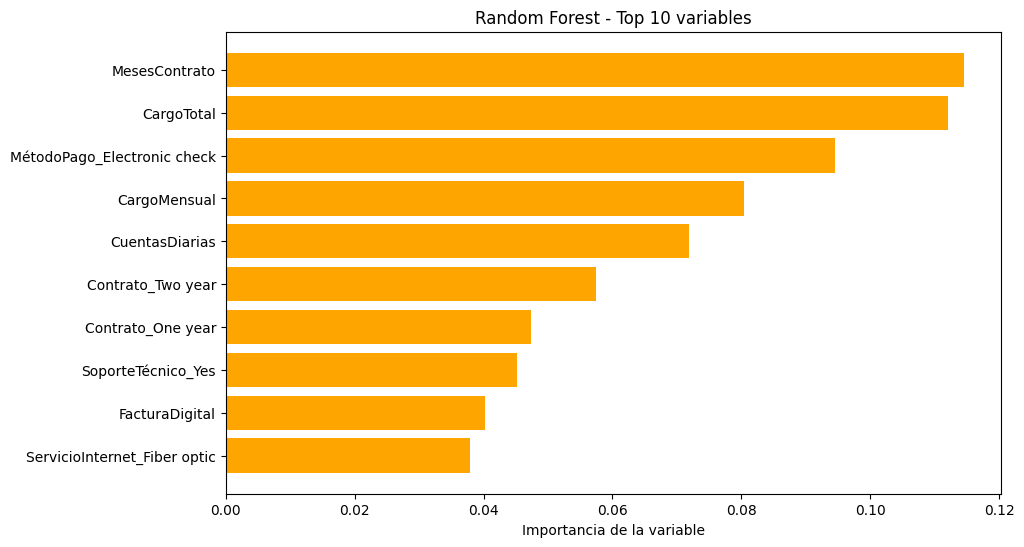

In [62]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

#Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # no necesita normalización

#Obtener importancia de variables
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

#Mostrar las 10 variables más importantes
print("Top 10 variables más importantes - Random Forest:")
print(importancia_rf.head(10))

#Visualización simple
plt.figure(figsize=(10,6))
plt.barh(importancia_rf['Variable'].head(10), importancia_rf['Importancia'].head(10), color='orange')
plt.title("Random Forest - Top 10 variables")
plt.gca().invert_yaxis()
plt.xlabel("Importancia de la variable")
plt.show()


Top 10 variables más importantes - SVM:
                                     Variable  Coeficiente
27                          Contrato_Two year    -1.651892
26                          Contrato_One year    -1.532652
3                               MesesContrato    -0.594495
7                                  CargoTotal     0.389727
16         RespaldoOnline_No internet service    -0.251199
13                        ServicioInternet_No    -0.251199
14        SeguridadOnline_No internet service    -0.251199
18  ProtecciónDispositivo_No internet service    -0.251199
20         SoporteTécnico_No internet service    -0.251199
24     PelículasStreaming_No internet service    -0.251199


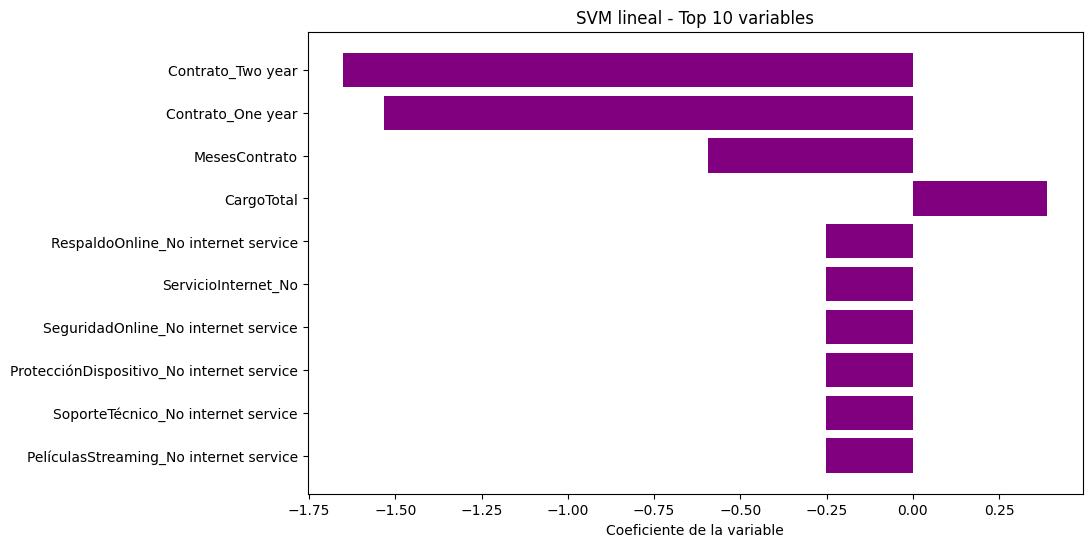

In [63]:
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

#Entrenar SVM lineal
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)  # SVM necesita datos escalados

#Obtener coeficientes
coef_svm = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': svm_model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

#Mostrar top 10 variables
print("Top 10 variables más importantes - SVM:")
print(coef_svm.head(10))

#isualización
plt.figure(figsize=(10,6))
plt.barh(coef_svm['Variable'].head(10), coef_svm['Coeficiente'].head(10), color='purple')
plt.title("SVM lineal - Top 10 variables")
plt.gca().invert_yaxis()
plt.xlabel("Coeficiente de la variable")
plt.show()


#Conclución

Informe de Análisis de Cancelación de Clientes

##Preparación de los datos
Primero, quitamos cosas que no nos servían, como el ID del cliente y columnas que tenían siempre el mismo valor o demasiados datos vacíos. También convertimos las columnas de texto en números para que los modelos los entendieran (por ejemplo, “Sí/No” pasó a 1 y 0).

Como había muchos más clientes que se quedaron que los que cancelaron, usamos SMOTE para balancear la cantidad de cada grupo. Así los modelos no se confunden por la diferencia de números.

Por último, normalizamos algunas columnas numéricas como MesesContrato o CargoTotal para los modelos que necesitan que los datos estén en la misma escala.

##Explorando los datos

* Antes de balancear, solo 27% de los clientes habían cancelado y 73% se quedaron.
* Mirando los gráficos, parecía que los clientes con contratos cortitos o cargos totales altos tenían más probabilidad de irse.
* Los boxplots y scatter plots nos ayudaron a ver estas tendencias de forma más clara.

##Dividiendo los datos
Separé los datos en entrenamiento y prueba (70/30).

* Entrenamiento: 7243 clientes
* Prueba: 3105 clientes

Gracias al balanceo, ambos grupos quedaron parejitos entre los que cancelaron y los que se quedaron.

##Modelos que probamos
Entrené dos modelos principales:

1. Regresión Logística (normalizamos los datos)
2. Random Forest (no necesitamos normalizar)

| Modelo              | Accuracy | Precision | Recall | F1-score |
| ------------------- | -------- | --------- | ------ | -------- |
| Regresión Logística | 0.77     | 0.74      | 0.81   | 0.78     |
| Random Forest       | 0.86     | 0.86      | 0.85   | 0.85     |

* Random Forest se ve mejor en general, predice más confiable si alguien va a cancelar.
* La Regresión Logística no lo hace tan mal, pero podría mejorar si ajustamos más cosas.

##Variables más importantes
Todos los modelos coinciden en algo:

* CargoTotal (los clientes que pagan más tienen más chance de cancelar)
* MesesContrato (los que tienen contratos más cortos se van antes)
* CuentasDiarias (muchas cuentas activas a veces significa que cancelan más)

Otras variables también ayudan, pero estas son las que más influyen según los modelos.

###Qué podemos hacer con esto
Con estos datos, se me ocurren algunas ideas para que menos clientes cancelen:

1. Clientes con contratos cortos o que pagan mucho: ofrecer descuentos o planes más flexibles para que se queden.
2. Clientes muy activos: darles beneficios o promociones exclusivas para que se sientan valorados.
3. Segmentos más vulnerables (adultos mayores, clientes sin pareja): enviarles mensajes más personalizados o atención especial.
4. Predicción temprana: usar el modelo Random Forest para ver quién tiene más riesgo de cancelar y actuar antes de que lo haga.
